In [26]:
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime

In [35]:
# Load your dataset
file_path = "../../data/output/freight_output comparison .csv"
df = pd.read_csv(file_path, encoding="latin1", low_memory=False)
df.head(2)

,ï»¿siteid,invoice_id,freight_price,unique_commodity_group_input,unique_commodity_description_input,total_estimated_area_cost,total_estimated_cwt_cost,total_est_lbs,total_est_sqyd,total_cost,total_quantity,UOM,freight_ratio,savings,Action,outlier_flag,Rolls
0,SPN,1687462,125.0,['1VNL'],['LVP'],0.0,250.51,5040.47,502.29,250.51,5040.47,LBS,2.00,Good,Analyse,Normal,50.4047
1,SPJ,1021902,4007.7,['1VNL'],"['LVT', 'VCT']",0.0,8621.97,101554.42,9566.48,8621.97,101554.42,LBS,2.15,Good,Audit,Normal,1015.5442


In [36]:
# Function to classify outliers based on thresholds
def classify_outlier(value, lower_threshold, upper_threshold):
    if value < lower_threshold:
        return 'lower'
    elif value > upper_threshold:
        return 'higher'
    else:
        return 'normal'

# Process for '1CBL'
df_1CBL = df[df['unique_commodity_group_input'] == "['1CBL']"]
q1_1CBL = df_1CBL['freight_ratio'].quantile(0.25)
q3_1CBL = df_1CBL['freight_ratio'].quantile(0.75)
iqr_1CBL = q3_1CBL - q1_1CBL
lower_threshold_1CBL = q1_1CBL - 1.5 * iqr_1CBL
upper_threshold_1CBL = q3_1CBL + 1.5 * iqr_1CBL
df_1CBL['Outlier 1CBL'] = df_1CBL['freight_ratio'].apply(classify_outlier, args=(lower_threshold_1CBL, upper_threshold_1CBL))

# Process for '1VNL'
df_1VNL = df[df['unique_commodity_group_input'] == "['1VNL']"]
q1_1VNL = df_1VNL['freight_ratio'].quantile(0.25)
q3_1VNL = df_1VNL['freight_ratio'].quantile(0.75)
iqr_1VNL = q3_1VNL - q1_1VNL
lower_threshold_1VNL = q1_1VNL - 1.5 * iqr_1VNL
upper_threshold_1VNL = q3_1VNL + 1.5 * iqr_1VNL
df_1VNL['Outlier 1VNL'] = df_1VNL['freight_ratio'].apply(classify_outlier, args=(lower_threshold_1VNL, upper_threshold_1VNL))

# Append the results back to the original dataframe
df = pd.concat([df, df_1CBL[['Outlier 1CBL']], df_1VNL[['Outlier 1VNL']]], axis=1)

# Display the updated dataframe
df.head(2)

C:\Users\ITafr\AppData\Local\Temp\ipykernel_31120\3584099256.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_1CBL['Outlier 1CBL'] = df_1CBL['freight_ratio'].apply(classify_outlier, args=(lower_threshold_1CBL, upper_threshold_1CBL))
C:\Users\ITafr\AppData\Local\Temp\ipykernel_31120\3584099256.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_1VNL['Outlier 1VNL'] = df_1VNL['freight_ratio'].apply(classify_outlier, args=(lower_threshold_1VNL, upper_threshold_1VNL))


,ï»¿siteid,invoice_id,freight_price,unique_commodity_group_input,unique_commodity_description_input,total_estimated_area_cost,total_estimated_cwt_cost,total_est_lbs,total_est_sqyd,total_cost,total_quantity,UOM,freight_ratio,savings,Action,outlier_flag,Rolls,Outlier 1CBL,Outlier 1VNL
0,SPN,1687462,125.0,['1VNL'],['LVP'],0.0,250.51,5040.47,502.29,250.51,5040.47,LBS,2.00,Good,Analyse,Normal,50.4047,NaN,normal
1,SPJ,1021902,4007.7,['1VNL'],"['LVT', 'VCT']",0.0,8621.97,101554.42,9566.48,8621.97,101554.42,LBS,2.15,Good,Audit,Normal,1015.5442,NaN,normal


In [37]:
df['Outlier 1CBL'] = df['Outlier 1CBL'].fillna('')
df['Outlier 1VNL'] = df['Outlier 1VNL'].fillna('')

Text(0.5, 0, 'Outlier Type')

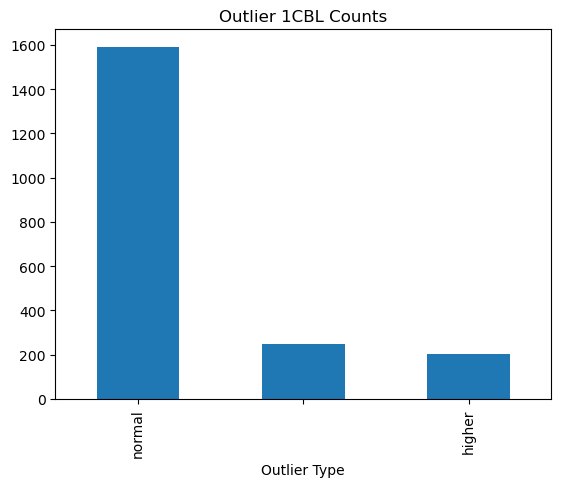

In [43]:
df['Outlier 1VNL'].value_counts().plot(kind='bar', title='Outlier 1CBL Counts')
plt.xlabel('Outlier Type')

In [31]:

pivot_summary = df.pivot_table(
    index='ï»¿siteid',
    values=['freight_price', 'total_cost', 'freight_ratio'],
    aggfunc={'freight_price': 'sum', 'total_cost': 'sum', 'freight_ratio': 'mean'}
).reset_index()

pivot_summary.rename(columns={
    'freight_price': 'Total Freight Price',
    'total_cost': 'Total Cost',
    'freight_ratio': 'Average Freight Ratio'
}, inplace=True)

pivot_summary.head()

,ï»¿siteid,Total Freight Price,Average Freight Ratio,Total Cost
0,DIT,47470.26,1.309537,34319.99
1,SPJ,82304.78,1.281004,93634.52
2,SPN,118503.53,2.325031,79980.97
3,SPT,166887.06,1.622099,162578.37
4,SPW,200526.60,2.238055,206881.86


In [39]:
filtered_df = df[(df['unique_commodity_group_input'] == "['1VNL']") & (df['Outlier 1CBL'] == 'normal')]
filtered_df.head()

,ï»¿siteid,invoice_id,freight_price,unique_commodity_group_input,unique_commodity_description_input,total_estimated_area_cost,total_estimated_cwt_cost,total_est_lbs,total_est_sqyd,total_cost,total_quantity,UOM,freight_ratio,savings,Action,outlier_flag,Rolls,Outlier 1CBL,Outlier 1VNL


In [45]:
df.to_excel('../../data/output/clean_IQR.xlsx', index=False)

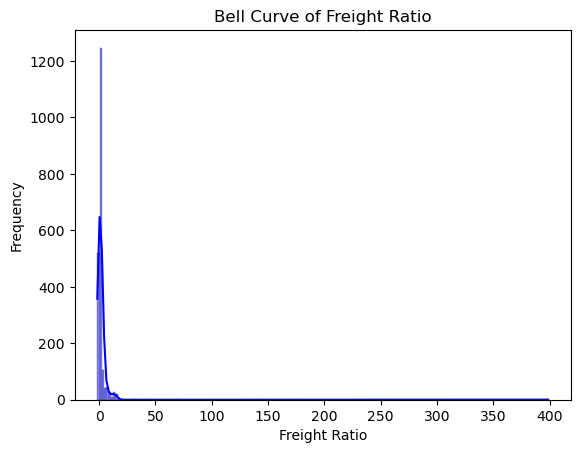

In [51]:
import seaborn as sns

# Calculate IQR for freight_ratio
q1 = df['freight_ratio'].quantile(0.25)
q3 = df['freight_ratio'].quantile(0.75)
iqr = q3 - q1

# Plot a bell curve for freight_ratio
sns.histplot(df['freight_ratio'], kde=True, bins=200, color='blue')
plt.title('Bell Curve of Freight Ratio')
plt.xlabel('Freight Ratio')
plt.ylabel('Frequency')
plt.show()

In [47]:
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

print(f"Lower Bound: {lower_bound}")
print(f"Upper Bound: {upper_bound}")

Lower Bound: -1.25
Upper Bound: 3.1500000000000004


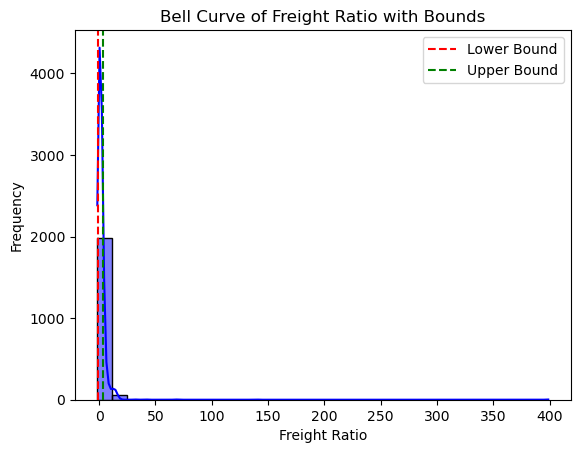

In [48]:
# Plot the bell curve for freight_ratio
sns.histplot(df['freight_ratio'], kde=True, bins=30, color='blue')
plt.axvline(lower_bound, color='red', linestyle='--', label='Lower Bound')
plt.axvline(upper_bound, color='green', linestyle='--', label='Upper Bound')
plt.title('Bell Curve of Freight Ratio with Bounds')
plt.xlabel('Freight Ratio')
plt.ylabel('Frequency')
plt.legend()
plt.show()

In [ ]:
# Export the relevant data to an Excel file
df[['freight_ratio', 'Outlier 1CBL', 'Outlier 1VNL']].to_excel('../../data/output/freight_ratio_graph_data.xlsx', index=False)

print("Data exported to 'freight_ratio_graph_data.xlsx'. You can now use Excel to create the graph.")
0

Data exported to 'freight_ratio_graph_data.xlsx'. You can now use Excel to create the graph.


In [52]:
df.columns

Index(['ï»¿siteid', 'invoice_id', 'freight_price',
       'unique_commodity_group_input', 'unique_commodity_description_input',
       'total_estimated_area_cost', 'total_estimated_cwt_cost',
       'total_est_lbs', 'total_est_sqyd', 'total_cost', 'total_quantity',
       'UOM', 'freight_ratio', 'savings', 'Action', 'outlier_flag', 'Rolls',
       'Outlier 1CBL', 'Outlier 1VNL'],
      dtype='object')

In [53]:

def calculate_xgs(row):
    if row['unique_commodity_group_input'] == '1VNL':
        try:
            return {'xgs(usd/lbs)': float(row['total_estimated_cwt_cost']) / row['total_est_lbs'] if row['total_est_lbs'] > 0 else None,
                    'xgs(usd/sqyd)': None}
        except (ValueError, TypeError):
            return {'xgs(usd/lbs)': None, 'xgs(usd/sqyd)': None}
    elif row['unique_commodity_group_input'] == '1CBL':
        try:
            return {'xgs(usd/sqyd)': float(row['total_estimated_area_cost']) / row['total_est_sqyd'] if row['total_est_sqyd'] > 0 else None,
                    'xgs(usd/lbs)': None}
        except (ValueError, TypeError):
            return {'xgs(usd/sqyd)': None, 'xgs(usd/lbs)': None}
    return {'xgs(usd/sqyd)': None, 'xgs(usd/lbs)': None}

# Apply the function to the dataframe
xgs_values = df.apply(calculate_xgs, axis=1)
df['xgs(usd/lbs)'] = [x['xgs(usd/lbs)'] for x in xgs_values]
df['xgs(usd/sqyd)'] = [x['xgs(usd/sqyd)'] for x in xgs_values]

In [59]:
def calculate_xgs(row):
    if row['unique_commodity_group_input'] == "['1VNL']":
        try:
            return {'xgs(usd/lbs)': float(row['total_estimated_cwt_cost']) / row['total_est_lbs'] if row['total_est_lbs'] > 0 else None,
                    'xgs(usd/sqyd)': None}
        except (ValueError, TypeError):
            return {'xgs(usd/lbs)': None, 'xgs(usd/sqyd)': None}
    elif row['unique_commodity_group_input'] == "['1CBL']":
        try:
            return {'xgs(usd/sqyd)': float(row['total_estimated_area_cost']) / row['total_est_sqyd'] if row['total_est_sqyd'] > 0 else None,
                    'xgs(usd/lbs)': None}
        except (ValueError, TypeError):
            return {'xgs(usd/sqyd)': None, 'xgs(usd/lbs)': None}
    return {'xgs(usd/sqyd)': None, 'xgs(usd/lbs)': None}

# Apply the function to the dataframe
xgs_values = df.apply(calculate_xgs, axis=1)
df['xgs(usd/lbs)'] = [x['xgs(usd/lbs)'] for x in xgs_values]
df['xgs(usd/sqyd)'] = [x['xgs(usd/sqyd)'] for x in xgs_values]

In [65]:
def calculate_market(row):
    if row['unique_commodity_group_input'] == '1VNL':
        try:
            return {'market(usd/lbs)': float(row['freight_price']) / row['total_est_lbs'] if row['total_est_lbs'] > 0 else None,
                    'market(usd/sqyd)': None}
        except (ValueError, TypeError):
            return {'market(usd/lbs)': None, 'market(usd/sqyd)': None}
    elif row['unique_commodity_group_input'] == '1CBL':
        try:
            return {'market(usd/sqyd)': float(row['freight_price']) / row['total_est_sqyd'] if row['total_est_sqyd'] > 0 else None,
                    'market(usd/lbs)': None}
        except (ValueError, TypeError):
            return {'market(usd/sqyd)': None, 'market(usd/lbs)': None}
    return {'market(usd/sqyd)': None, 'market(usd/lbs)': None}

# Apply the function to the dataframe
xgs_values = df.apply(calculate_market, axis=1)
df['market(usd/lbs)'] = [x['market(usd/lbs)'] for x in xgs_values]
df['market(usd/sqyd)'] = [x['market(usd/sqyd)'] for x in xgs_values]

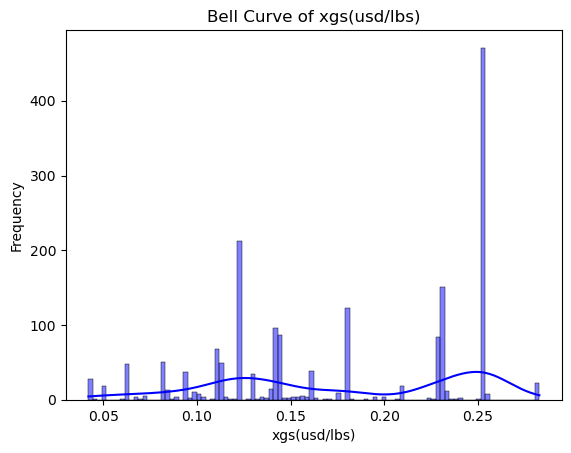

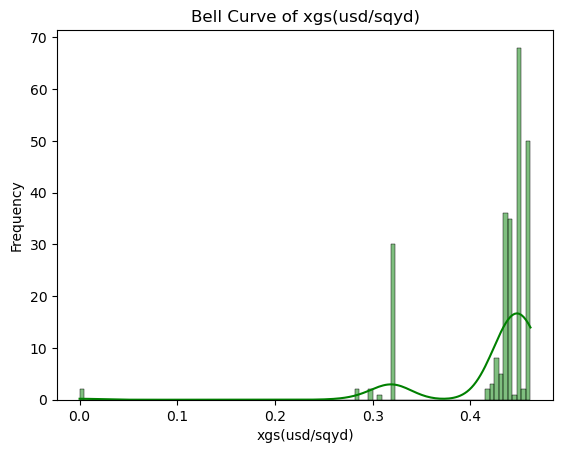

In [62]:
# Plot bell curve for 'xgs(usd/lbs)'
sns.histplot(df['xgs(usd/lbs)'].dropna(), kde=True, bins=100
             , color='blue')
plt.title('Bell Curve of xgs(usd/lbs)')
plt.xlabel('xgs(usd/lbs)')
plt.ylabel('Frequency')
plt.show()

# Plot bell curve for 'xgs(usd/sqyd)'
sns.histplot(df['xgs(usd/sqyd)'].dropna(), kde=True, bins=100, color='green')
plt.title('Bell Curve of xgs(usd/sqyd)')
plt.xlabel('xgs(usd/sqyd)')
plt.ylabel('Frequency')
plt.show()

In [63]:
freight_cost_per_site = df.groupby('ï»¿siteid')['freight_price'].sum().reset_index()
freight_cost_per_site.rename(columns={'freight_price': 'Total Freight Cost'}, inplace=True)
freight_cost_per_site

,ï»¿siteid,Total Freight Cost
0,DIT,47470.26
1,SPJ,82304.78
2,SPN,118503.53
3,SPT,166887.06
4,SPW,200526.60


In [72]:
def calculate_market(row):
    if row['unique_commodity_group_input'] == "['1VNL']":
        try:
            return {'market(usd/lbs)': float(row['freight_price']) / row['total_est_lbs'] if row['total_est_lbs'] > 0 else None,
                    'market(usd/sqyd)': None}
        except (ValueError, TypeError):
            return {'market(usd/lbs)': None, 'market(usd/sqyd)': None}
    elif row['unique_commodity_group_input'] == "['1CBL']":
        try:
            return {'market(usd/sqyd)': float(row['freight_price']) / row['total_est_sqyd'] if row['total_est_sqyd'] > 0 else None,
                    'market(usd/lbs)': None}
        except (ValueError, TypeError):
            return {'market(usd/sqyd)': None, 'market(usd/lbs)': None}
    return {'market(usd/sqyd)': None, 'market(usd/lbs)': None}

# Apply the function to the dataframe
market_values = df.apply(calculate_market, axis=1)
df['market(usd/lbs)'] = [x['market(usd/lbs)'] for x in market_values]
df['market(usd/sqyd)'] = [x['market(usd/sqyd)'] for x in market_values]

In [73]:
df.head(2)

,ï»¿siteid,invoice_id,freight_price,unique_commodity_group_input,unique_commodity_description_input,total_estimated_area_cost,total_estimated_cwt_cost,total_est_lbs,total_est_sqyd,total_cost,...,savings,Action,outlier_flag,Rolls,Outlier 1CBL,Outlier 1VNL,xgs(usd/lbs),xgs(usd/sqyd),market(usd/lbs),market(usd/sqyd)
0,SPN,1687462,125.0,['1VNL'],['LVP'],0.0,250.51,5040.47,502.29,250.51,...,Good,Analyse,Normal,50.4047,,normal,0.0497,NaN,0.024799,NaN
1,SPJ,1021902,4007.7,['1VNL'],"['LVT', 'VCT']",0.0,8621.97,101554.42,9566.48,8621.97,...,Good,Audit,Normal,1015.5442,,normal,0.0849,NaN,0.039464,NaN


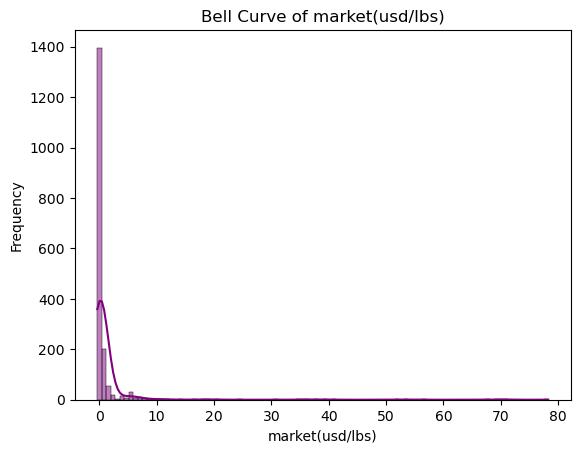

In [77]:
# Plot bell curve for 'market(usd/lbs)'
sns.histplot(df['market(usd/lbs)'].dropna(), kde=True, bins=100, color='purple')
plt.title('Bell Curve of market(usd/lbs)')
plt.xlabel('market(usd/lbs)')
plt.ylabel('Frequency')
plt.show()

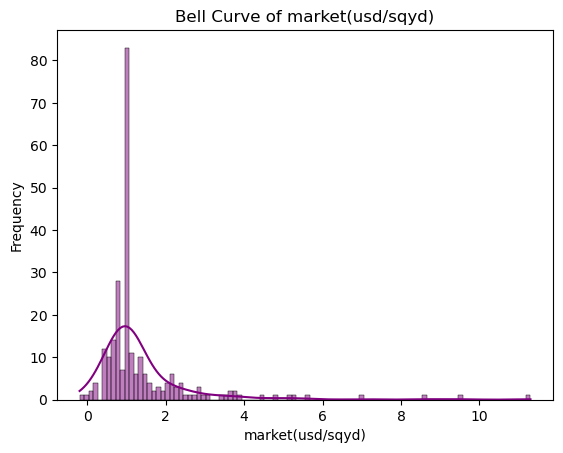

In [80]:
# Plot bell curve for 'market(usd/lbs)'
sns.histplot(df['market(usd/sqyd)'].dropna(), kde=True, bins=100, color='purple')
plt.title('Bell Curve of market(usd/sqyd)')
plt.xlabel('market(usd/sqyd)')
plt.ylabel('Frequency')
plt.show()

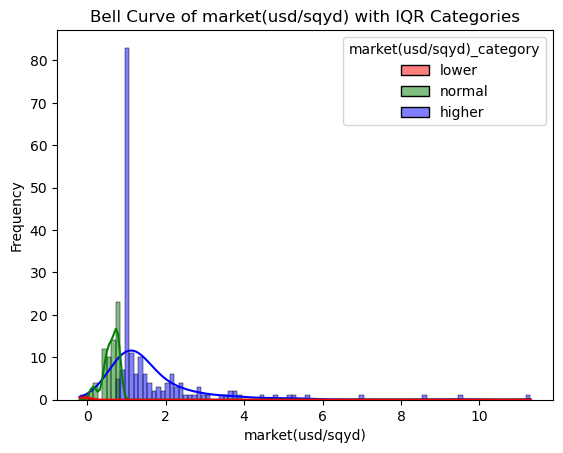

In [82]:
# Define bins based on IQR thresholds
bins = [-float('inf'), lower_threshold, upper_threshold, float('inf')]
labels = ['lower', 'normal', 'higher']

# Categorize the data
df['market(usd/sqyd)_category'] = pd.cut(df['market(usd/sqyd)'], bins=bins, labels=labels)

# Plot the histogram with hue based on the categories
sns.histplot(data=df, x='market(usd/sqyd)', kde=True, bins=100, hue='market(usd/sqyd)_category', palette={'lower': 'red', 'normal': 'green', 'higher': 'blue'})
plt.title('Bell Curve of market(usd/sqyd) with IQR Categories')
plt.xlabel('market(usd/sqyd)')
plt.ylabel('Frequency')
plt.show()

IQR for market(usd/sqyd): 0.5630624999999998
